Project Proposal: Predicting Quality of Wine  

Introduction 

background:

question:

indentify:

In [78]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

In [114]:
wine_quality <- read_csv(file = "/home/jovyan/dsci-project/DSCI-Project/winequalityN.csv", 
                         make.names(colnames(wine_quality)))

white_quality <- filter(wine_quality, type == "white") |>
                select(volatile.acidity, chlorides, total.sulfur.dioxide, quality) |>
                na.omit(volatile.acidity, chlorides, total.sulfur.dioxide, quality)
white_quality$volatile.acidity <- as.numeric(white_quality$volatile.acidity)
white_quality$chlorides<-as.numeric(white_quality$chlorides)
white_quality$total.sulfur.dioxide<-as.numeric(white_quality$total.sulfur.dioxide)
white_quality$quality<-as.numeric(white_quality$quality)

white_quality

Rows: 6498 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): type, fixed.acidity, volatile.acidity, citric.acid, residual.sugar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


volatile.acidity,chlorides,total.sulfur.dioxide,quality
<dbl>,<dbl>,<dbl>,<dbl>
0.27,0.045,170,6
0.30,0.049,132,6
0.28,0.050,97,6
0.23,0.058,186,6
0.23,0.058,186,6
0.28,0.050,97,6
0.32,0.045,136,6
0.27,0.045,170,6
0.30,0.049,132,6


In [115]:
wine_split <- initial_split(white_quality, prop = 0.75, strata = quality)
wine_train <- training (wine_split)
wine_test <- testing(wine_split)

In [116]:
#summarize with training data

In [162]:
wine_table <- wine_train|>
    group_by(quality)|>           
    summarize(mean.vol = mean(volatile.acidity), mean.chlor = mean(chlorides), mean.sulf = mean(total.sulfur.dioxide))

wine_table

quality,mean.vol,mean.chlor,mean.sulf
<dbl>,<dbl>,<dbl>,<dbl>
3,0.3080000,0.04613333,187.8667
4,0.3957500,0.05110833,127.4458
5,0.3014927,0.05181319,150.3640
6,0.2592492,0.04511915,136.7690
7,0.2644266,0.03773242,125.1751
8,0.2836397,0.03735294,125.6397
9,0.3266667,0.02366667,105.6667


In [118]:
#plot with training data

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'mean.sulf' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(pri

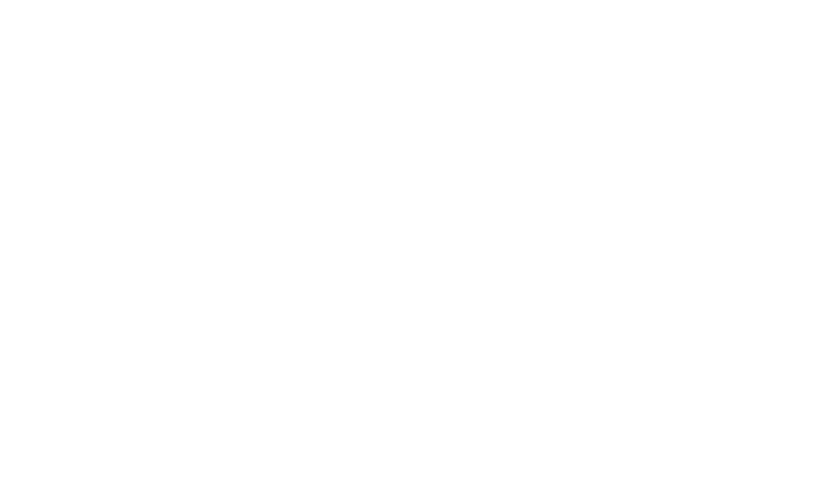

In [161]:
library(ggplot2)
library(patchwork)

options(repr.plot.height = 4, repr.plot.width = 7)
plot_wine_vol <- wine_table |>
                    ggplot(aes(x= quality, y=mean.vol))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Volatile Acidity", y = "Quality (on scale of 10)", 
                                title = "Mean Volatile Acidty Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                        

plot_wine_chlor <- wine_table |>
                    ggplot(aes(x= quality, y=mean.chlor))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Chloride Level", y = "Quality (on scale of 10)", 
                                title = "Mean Chloride Levels Against Quality of Wine")+
                                theme(text = element_text(size = 10))
plot_wine_sulf <- wine_table |>
                    ggplot(aes(x= quality, y=mean_sulf))+
                           geom_bar(stat = "identity") +
                           labs(x = "Mean Sulfide Level", y = "Quality (on scale of 10)", 
                                title = "Mean Sulfide Levels Against Quality of Wine")+
                                theme(text = element_text(size = 10))
                            
plot_wine_chlor+plot_wine_vol+ plot_wine_sulf